<a href="https://colab.research.google.com/github/Mstfayldz/MachineLearningNotebooks/blob/master/8_LogsticRegression_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('8-fraud_detection.csv')

In [3]:
df.columns

Index(['transaction_amount', 'transaction_risk_score', 'is_fraud'], dtype='object')

In [4]:
df.head()

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [6]:
df['is_fraud'].unique()# binary

array([0, 1])

In [8]:
df['is_fraud'].value_counts() #imbalance   Normalde bu veriyi balance etmemiz gerekiyor(resample, SMOTE,upsamplin,downampling)

,count
is_fraud,
0,9846
1,154


In [9]:
X=df.drop("is_fraud", axis=1)
y=df["is_fraud"]

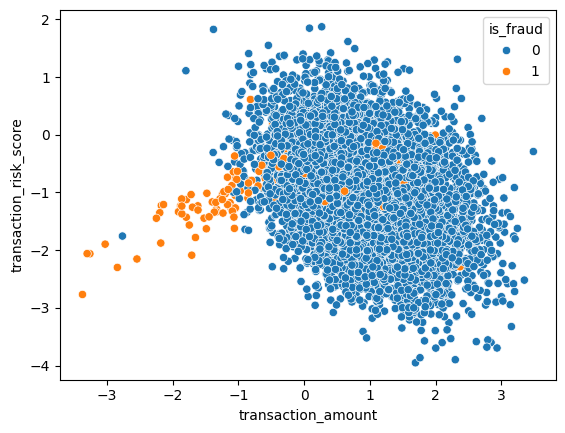

In [10]:
sns.scatterplot(x=X["transaction_amount"],y=X["transaction_risk_score"], hue= y)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

# class_weight
datasetimiz imbalanced olduğu için ve biz veriyi balance yapmadığımız için  var olan labellarımıa ağırlık vereceğiz örnekte 1 değeri 0 a nazaran çok az olduğu için 1 değerinin ağırlığını fazla tutacağız

In [15]:
#Hyperparameter tuning ibmbalance olanlar için bu alttaki kod bloğu direk kullanılabilir

penalty=["l1","l2","elasticnet"]
c_values=[100,10,1,0.1,0.01] # C penalty yani cezalandırmaların lambda değeri için verilen değerdir
solver=["newton-cg","lbfgs","liblinear","newton-cholesky","sag","saga"]
class_weight=[{0:w , 1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [16]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [18]:
params= dict(penalty=penalty, C= c_values , solver=solver, class_weight= class_weight)

In [19]:
from sklearn.model_selection import GridSearchCV , StratifiedKFold

In [20]:
cv= StratifiedKFold()

In [21]:
gridcv= GridSearchCV(estimator=model,param_grid=params, scoring="accuracy", cv=cv )

In [22]:
import warnings
warnings.filterwarnings("ignore") # warningleri görstermesin ki uzamasın çok

In [24]:
gridcv.fit(X_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [26]:
gridcv.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [27]:
gridcv.best_score_

np.float64(0.9882666666666667)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
y_pred=gridcv.predict(X_test)

score= accuracy_score(y_pred,y_test)
print("score:",score)
print(classification_report(y_pred,y_test))
print("confusion matrix:\n",confusion_matrix(y_pred,y_test))

score: 0.9896
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2491
           1       0.26      1.00      0.41         9

    accuracy                           0.99      2500
   macro avg       0.63      0.99      0.70      2500
weighted avg       1.00      0.99      0.99      2500

confusion matrix:
 [[2465   26]
 [   0    9]]


#  ROC / AUC
IMBALANCE DATASETS için uygundur

ROC Eğrisi (Receiver Operating Characteristic)
Modelin farklı sınıflandırma eşiklerinde (threshold) ne kadar iyi performans gösterdiğini görselleştiren bir grafiktir. Bu grafikte, TRUE POSITIVE oranı (duyarlılık/RECALL) Y-EKSENİ ile FALSE POSITVE X-EKSENİ oranı arasındaki ilişkiyi bir eğri şeklinde görürüz.


AUC (Area Under the Curve)ROC eğrisinin altında kalan toplam alanı temsil eden sayısal bir değerdir. $0$ ile $1$ arasında değişen bu değer ne kadar yüksekse (yani $1$'e ne kadar yakınsa), modelin sınıfları birbirinden ayırt etme yeteneği o kadar güçlü demektir.

Kısacası: ROC bir grafik, AUC ise o grafiğin başarısını özetleyen puandır.

In [31]:
model_prob = gridcv.predict_proba(X_test) # test verisinin verebileceği tüm sonuçlar

In [32]:
model_prob # sol taraf=0 sağ taraf = 1 olma durumu

array([[0.92404456, 0.07595544],
       [0.9967213 , 0.0032787 ],
       [0.94228968, 0.05771032],
       ...,
       [0.92179108, 0.07820892],
       [0.9877336 , 0.0122664 ],
       [0.97176634, 0.02823366]])

In [34]:
model_prob[:,1] # probalities for the positive(1/fraud) class

array([0.07595544, 0.0032787 , 0.05771032, ..., 0.07820892, 0.0122664 ,
       0.02823366])

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

In [37]:
model_auc= roc_auc_score(y_test, model_prob[:,1])

In [38]:
model_auc

np.float64(0.7266183714865255)

In [39]:
roc_curve(y_test, model_prob[:,1]) # 1. array ==> fpr: false positive rate
                                   # 2. array ==> tpr: true positive rate
                                   # 3. array ==> treshold( eşik değerleri)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.05679513e-04,
        4.05679513e-04, 2.43407708e-03, 2.43407708e-03, 5.27383367e-03,
        5.27383367e-03, 9.33062880e-03, 9.33062880e-03, 1.98782961e-02,
        1.98782961e-02, 3.73225152e-02, 3.73225152e-02, 4.09736308e-02,
        4.09736308e-02, 9.45233266e-02, 9.45233266e-02, 1.08722110e-01,
        1.08722110e-01, 2.28397566e-01, 2.28397566e-01, 2.93306288e-01,
        2.93306288e-01, 4.40162272e-01, 4.40162272e-01, 4.47870183e-01,
        4.47870183e-01, 5.13184584e-01, 5.13184584e-01, 5.67545639e-01,
        5.67545639e-01, 7.05070994e-01, 7.05070994e-01, 7.17647059e-01,
        7.17647059e-01, 7.49290061e-01, 7.49290061e-01, 8.40567951e-01,
        8.40567951e-01, 8.67748479e-01, 8.67748479e-01, 9.45638945e-01,
        9.45638945e-01, 9.66328600e-01, 9.66328600e-01, 9.66734280e-01,
        9.66734280e-01, 1.00000000e+00]),
 array([0.        , 0.02857143, 0.34285714, 0.34285714, 0.37142857,
        0.37142857, 0.4   

In [44]:
model_fpr,model_tpr, thresholds= roc_curve(y_test, model_prob[:,1])

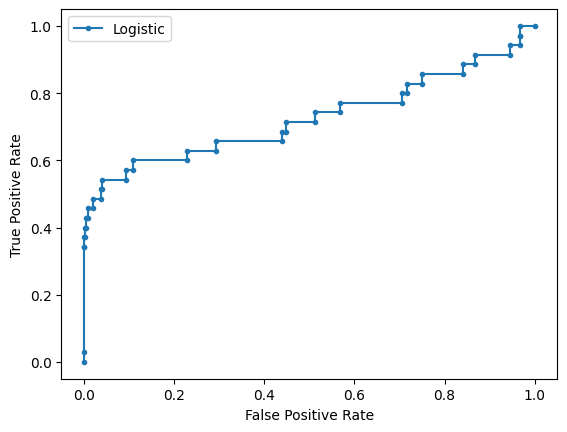

In [45]:
plt.plot(model_fpr,model_tpr, marker=".", label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

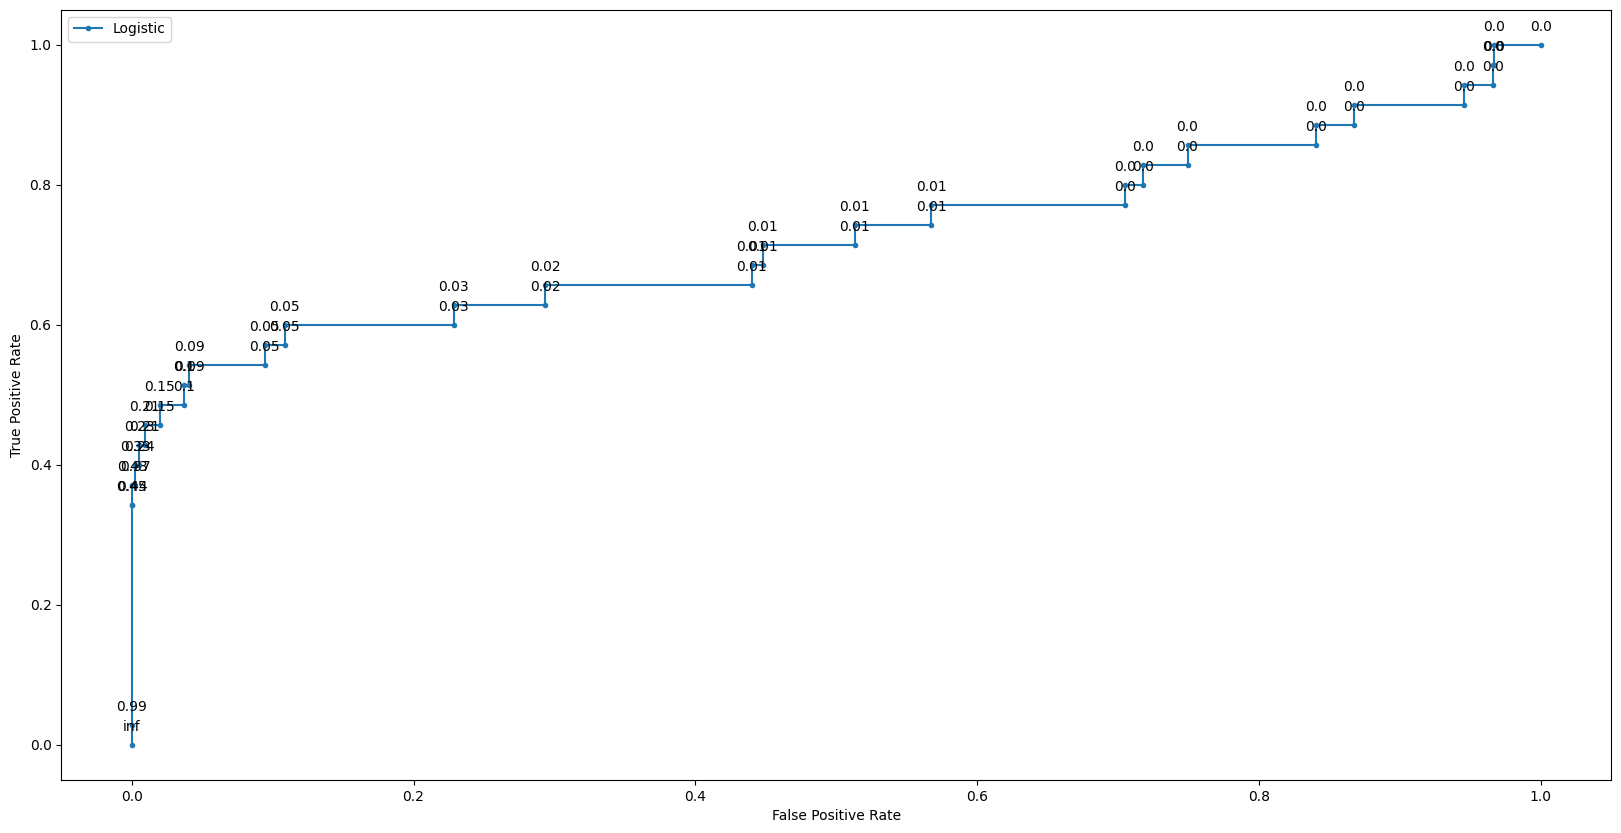

In [46]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot ROC curve
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate each point with the threshold
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(thresh, 2)}', (fpr, tpr), textcoords="offset points", xytext=(0,10), ha='center')

# Labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Show the plot
plt.show()

In [48]:
# Pick a custom threshold (e.g., from your annotated ROC curve)
custom_threshold = 0.2  # You can change this to what you chose

# Predict using custom threshold
y_pred_custom = (model_prob[:,1] >= custom_threshold).astype(int)
print(model_prob[:,1]  >= custom_threshold)
print(y_pred_custom)

# Evaluate
print(f"\n Evaluation using custom threshold = {custom_threshold}")
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

[False False False ... False False False]
[0 0 0 ... 0 0 0]

 Evaluation using custom threshold = 0.2
[[2440   25]
 [  19   16]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2465
           1       0.39      0.46      0.42        35

    accuracy                           0.98      2500
   macro avg       0.69      0.72      0.71      2500
weighted avg       0.98      0.98      0.98      2500



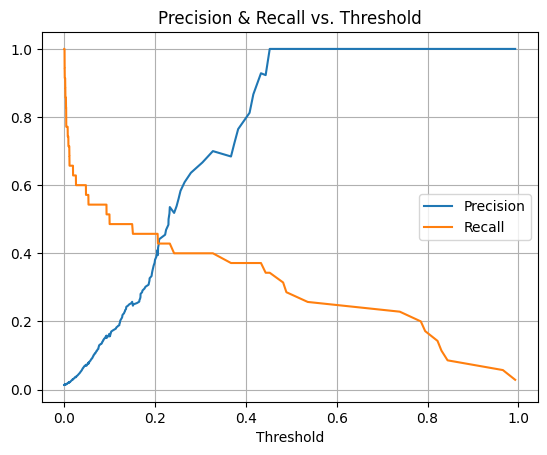

In [49]:
#If you want to find the best threshold based on precision, recall, or F1 you can plot Performance Metrics at Different Thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, model_prob[:,1])

# Plot precision and recall vs threshold
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision & Recall vs. Threshold')
plt.grid()
plt.show()